## Exercise 1
Calculate the number of scored and lost goals per season for the team of your preference.

- filter the matches to get only those with our team - please do a copy of it (.copy)
- using .apply extract team and opponent goals
- use groupby and aggregate to groupby matches by season and the aggregate them on team and opponent goals using sum

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/MuhammetBilgic/Numpy_Excercises/main/ALX_day_7/matches.csv'
matches = pd.read_csv(url, parse_dates=['date'])
matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2008-08-17,2008/2009,1,1
1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2008-08-16,2008/2009,0,0
2,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2008-08-16,2008/2009,0,3
3,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,2008-08-17,2008/2009,5,0
4,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2008-08-16,2008/2009,1,3
...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,FC St. Gallen,FC Thun,2015-09-22,2015/2016,1,0
25975,Switzerland,Switzerland Super League,FC Vaduz,FC Luzern,2015-09-23,2015/2016,1,2
25976,Switzerland,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2015-09-23,2015/2016,2,0
25977,Switzerland,Switzerland Super League,Lugano,FC Zürich,2015-09-22,2015/2016,0,0


In [3]:
team = 'Arsenal'
team_matches = matches[(matches.home_team == team) | (matches.away_team == team)].copy()
team_matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
1729,England,England Premier League,Arsenal,West Bromwich Albion,2008-08-16,2008/2009,1,0
1739,England,England Premier League,Arsenal,Tottenham Hotspur,2008-10-29,2008/2009,4,4
1756,England,England Premier League,Stoke City,Arsenal,2008-11-01,2008/2009,2,1
1758,England,England Premier League,Arsenal,Manchester United,2008-11-08,2008/2009,2,1
1769,England,England Premier League,Arsenal,Aston Villa,2008-11-15,2008/2009,0,2
...,...,...,...,...,...,...,...,...
4718,England,England Premier League,Arsenal,Stoke City,2015-09-12,2015/2016,2,0
4730,England,England Premier League,Chelsea,Arsenal,2015-09-19,2015/2016,2,0
4738,England,England Premier League,Leicester City,Arsenal,2015-09-26,2015/2016,2,5
4748,England,England Premier League,Arsenal,Manchester United,2015-10-04,2015/2016,3,0


If one liner: row.home_team_goal if row.home_team != team else row.away_team_goal

is equivalent to:

if row.home_team != team:
    return row.home_team_goal
else:
    row.away_team_goal

In [4]:
def team_goals(row):
    if row.home_team == team:
        return row.home_team_goal
    else:
        return row.away_team_goal

team_matches['team_goals'] = team_matches.apply(team_goals, axis=1)
team_matches['opponent_goals'] = team_matches.apply(
    lambda row: row.home_team_goal if row.home_team != team else row.away_team_goal, 
    axis=1
)
team_matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,team_goals,opponent_goals
1729,England,England Premier League,Arsenal,West Bromwich Albion,2008-08-16,2008/2009,1,0,1,0
1739,England,England Premier League,Arsenal,Tottenham Hotspur,2008-10-29,2008/2009,4,4,4,4
1756,England,England Premier League,Stoke City,Arsenal,2008-11-01,2008/2009,2,1,1,2
1758,England,England Premier League,Arsenal,Manchester United,2008-11-08,2008/2009,2,1,2,1
1769,England,England Premier League,Arsenal,Aston Villa,2008-11-15,2008/2009,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...
4718,England,England Premier League,Arsenal,Stoke City,2015-09-12,2015/2016,2,0,2,0
4730,England,England Premier League,Chelsea,Arsenal,2015-09-19,2015/2016,2,0,0,2
4738,England,England Premier League,Leicester City,Arsenal,2015-09-26,2015/2016,2,5,5,2
4748,England,England Premier League,Arsenal,Manchester United,2015-10-04,2015/2016,3,0,3,0


In [5]:
goals_per_season = team_matches.groupby('season').agg({
    'team_goals': sum,
    'opponent_goals': sum,
})
goals_per_season

,team_goals,opponent_goals
season,,
2008/2009,68,37
2009/2010,83,41
2010/2011,72,43
2011/2012,74,49
2012/2013,72,37
2013/2014,68,41
2014/2015,71,36
2015/2016,65,36


<AxesSubplot:xlabel='season'>

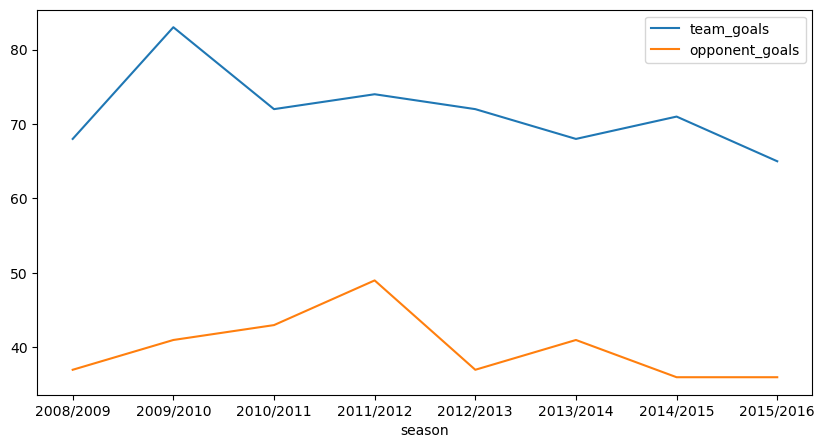

In [6]:
goals_per_season.plot(figsize=(10,5))

<AxesSubplot:xlabel='season'>

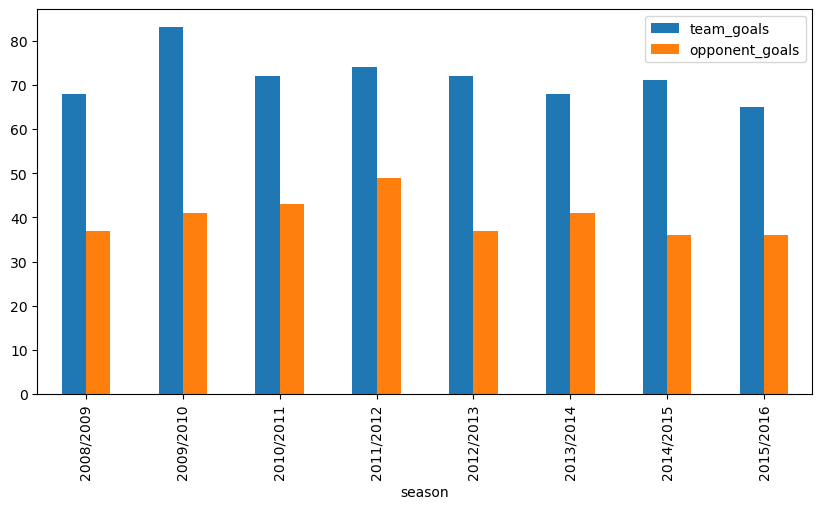

In [7]:
goals_per_season.plot(kind='bar', figsize=(10,5))


<AxesSubplot:xlabel='season'>

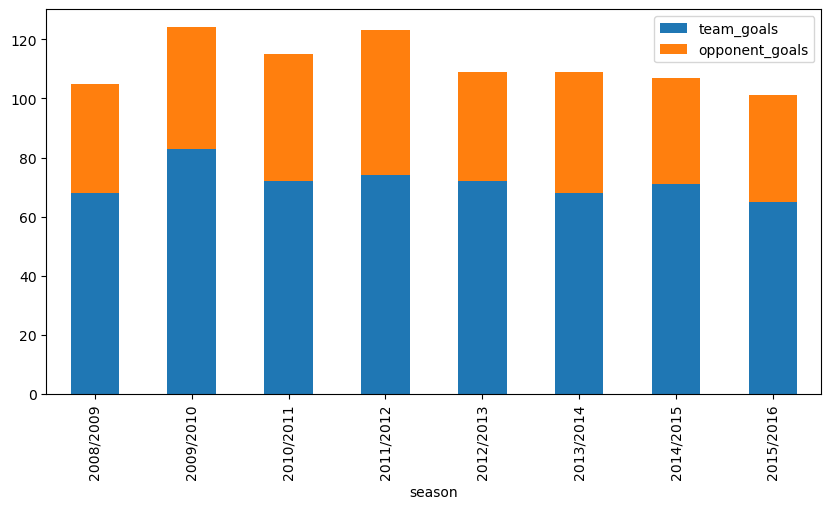

In [8]:
goals_per_season.plot(kind='bar', stacked=True, figsize=(10,5))


<AxesSubplot:ylabel='season'>

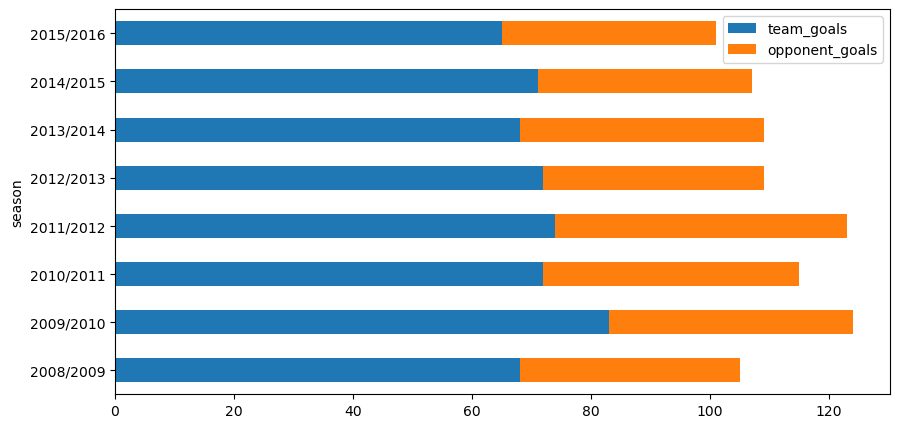

In [9]:
goals_per_season.plot(kind='barh', stacked=True, figsize=(10,5))
